In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [62]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
from sklearn.model_selection import train_test_split

In [63]:
!pip install tpot
!pip install scikit-optimize

In [64]:
from skopt import BayesSearchCV, plots
from sklearn.ensemble import ExtraTreesClassifier
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [65]:
# combined data
# load processed data
train_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_mean_mode.csv')
train_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_latest.csv')
train_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_entropy_std.csv')
train_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_min.csv')
train_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_max.csv')
train_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q1.csv')
train_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q3.csv')
train_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_kurtosis.csv')
train_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_skewness.csv')
train_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_range.csv')
train_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_iqr.csv')
train_latest = train_latest.drop(train_latest.columns[0:13], axis=1)
train_dispers = train_dispers.drop(train_dispers.columns[0:13], axis=1)
train_min = train_min.drop(train_min.columns[0:13], axis=1)
train_max = train_max.drop(train_max.columns[0:13], axis=1)
train_q1 = train_q1.drop(train_q1.columns[0:13], axis=1)
train_q3 = train_q3.drop(train_q3.columns[0:13], axis=1)
train_kurtois = train_kurtosis.drop(train_kurtosis.columns[0:13], axis=1)
train_skewness = train_skewness.drop(train_skewness.columns[0:13], axis=1)
train_range = train_range.drop(train_range.columns[0:13], axis=1)
train_iqr = train_iqr.drop(train_iqr.columns[0:13], axis=1)

# merge train_ and train_latest
train = pd.concat([train_mean, train_latest, train_dispers, train_min, train_max], axis=1)

# load processed data
test_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_mean_mode.csv')
test_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_latest.csv')
test_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_entropy_std.csv')
test_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_min.csv')
test_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_max.csv')
test_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q1.csv')
test_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q3.csv')
test_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_kurtosis.csv')
test_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_skewness.csv')
test_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_range.csv')
test_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_iqr.csv')
test_latest = test_latest.drop(test_latest.columns[0:12], axis=1)
test_dispers = test_dispers.drop(test_dispers.columns[0:12], axis=1)
test_min = test_min.drop(test_min.columns[0:12], axis=1)
test_max = test_max.drop(test_max.columns[0:12], axis=1)
test_q1 = test_q1.drop(test_q1.columns[0:12], axis=1)
test_q3 = test_q3.drop(test_q3.columns[0:12], axis=1)
test_kurtosis = test_kurtosis.drop(test_kurtosis.columns[0:12], axis=1)
test_skewness = test_skewness.drop(test_skewness.columns[0:12], axis=1)
test_range = test_range.drop(test_range.columns[0:12], axis=1)
test_iqr = test_iqr.drop(test_iqr.columns[0:12], axis=1)

# merge train_mean and train_latest
test = pd.concat([test_mean, test_latest, test_dispers, test_min, test_max], axis=1)

train = train.drop(train.columns[11], axis=1)
test = test.drop(test.columns[11], axis=1)

In [66]:
x_train = train.iloc[:,12:]
y_train = train.iloc[:,11]

#!wget https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/code_base/adjust_imbl.py
#from adjust_imbl import adjust_imbl
#x_train, y_train = adjust_imbl(x_train, y_train)

x_test = test.iloc[:,11:]

In [67]:
from sklearn.metrics import make_scorer, roc_auc_score

# Define a scorer based on AUC
scorer_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

# Define the parameter space for the ExtraTrees model
param_space = {
    'n_estimators': Integer(1, 2000),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
}

# Custom ExtraTrees model with callbacks
class ExtraTreesWithCallbacks(ExtraTreesClassifier):
    def fit(self, X, y, callbacks=None):
        if callbacks is None:
            return super().fit(X, y)
        else:
            history = self.fit(X, y)
            for callback in callbacks:
                callback.on_train_end(history)
            return history

# Create the ExtraTrees model
extra_trees_model = ExtraTreesWithCallbacks(class_weight='balanced', n_jobs=-1, random_state=42)

# Define the callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
]

# Define a custom scorer for cross-validation
scorer = make_scorer(accuracy_score)

# Create the BayesSearchCV object
opt_extra_trees = BayesSearchCV(
    extra_trees_model,
    search_spaces=param_space,
    n_iter=50,
    cv=KFold(n_splits=5, shuffle=True),
    scoring=scorer_auc,
    n_jobs=-1,
    random_state=42,
)

# Fit the BayesSearchCV object to the data
history=opt_extra_trees.fit(x_train, y_train, callbacks=callbacks)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/loc

In [68]:
# Get the best parameters
best_params = opt_extra_trees.best_params_
print("Best Parameters:", best_params)

Best Parameters: OrderedDict([('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 1263)])


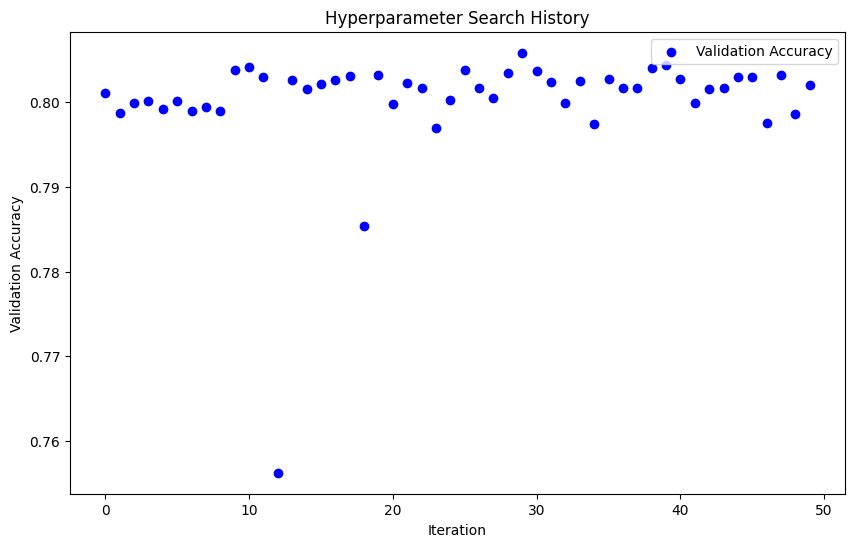

In [69]:
import matplotlib.pyplot as plt

# Access the hyperparameter search history
hyperparameters = opt_extra_trees.cv_results_['params']
scores = opt_extra_trees.cv_results_['mean_test_score']

# Plot the hyperparameter search history
plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores, c='b', label='Validation Accuracy')
plt.title('Hyperparameter Search History')
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

array([[<Axes: xlabel='min_samples_leaf', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >],
       [<Axes: ylabel='min_samples_split'>,
        <Axes: xlabel='min_samples_split', ylabel='Partial dependence'>,
        <Axes: >],
       [<Axes: xlabel='min_samples_leaf', ylabel='n_estimators'>,
        <Axes: xlabel='min_samples_split'>,
        <Axes: xlabel='n_estimators', ylabel='Partial dependence'>]],
      dtype=object)

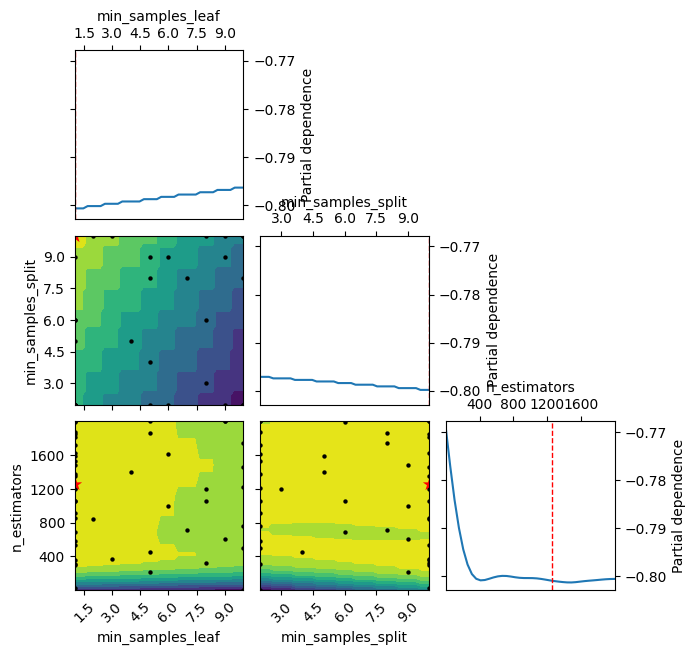

In [70]:
# objective plot
plots.plot_objective(opt_extra_trees.optimizer_results_[0])

array([[<Axes: xlabel='min_samples_leaf', ylabel='Number of samples'>,
        <Axes: >, <Axes: >],
       [<Axes: ylabel='min_samples_split'>,
        <Axes: xlabel='min_samples_split', ylabel='Number of samples'>,
        <Axes: >],
       [<Axes: xlabel='min_samples_leaf', ylabel='n_estimators'>,
        <Axes: xlabel='min_samples_split'>,
        <Axes: xlabel='n_estimators', ylabel='Number of samples'>]],
      dtype=object)

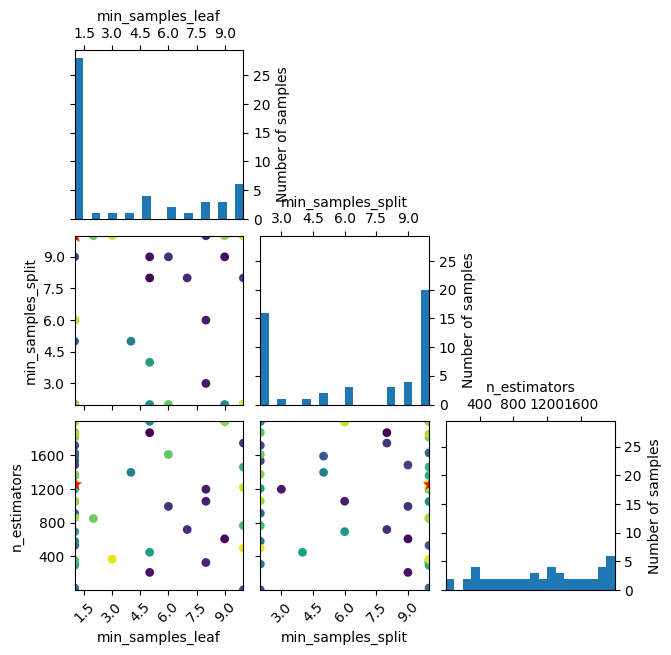

In [71]:
# evaluation plot
plots.plot_evaluations(opt_extra_trees.optimizer_results_[0])

In [72]:
best_params = opt_extra_trees.best_params_
best_auc_extra_trees = opt_extra_trees.best_score_
print("Best params:", opt_extra_trees.best_params_)
print("Best AUC: %.4f" % opt_extra_trees.best_score_)

Best params: OrderedDict([('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 1263)])
Best AUC: 0.8059


In [73]:
best_params = opt_extra_trees.best_params_

# Create a new ExtraTrees model with the best parameters
best_extra_trees_model = ExtraTreesClassifier(**best_params, class_weight='balanced', n_jobs=-1, random_state=42)

# Fit the model on the training data
best_extra_trees_model.fit(x_train, y_train)

best_extra_trees_model.fit(x_train, y_train)
best_extra_trees_model_accuracy_train = accuracy_score(y_train, best_extra_trees_model.predict(x_train))
best_extra_trees_model_auc_train = roc_auc_score(y_train, best_extra_trees_model.predict_proba(x_train)[:, 1])
best_extra_trees_model_accuracy_cv = cross_val_score(best_extra_trees_model, x_train, y_train, cv=5)
best_extra_trees_model_auc_cv = cross_val_score(best_extra_trees_model, x_train, y_train, cv=5, scoring='roc_auc')
print(f'Extra Trees Accuracy (train): {best_extra_trees_model_accuracy_train:.4f}')
print(f'Extra Trees AUC (train): {best_extra_trees_model_auc_train:.4f}')
print(f'Extra Trees Accuracy (cv): {best_extra_trees_model_accuracy_cv.mean():.4f}')
print(f'Extra Trees AUC (cv): {best_extra_trees_model_auc_cv.mean():.4f}')

Extra Trees Accuracy (train): 0.9981
Extra Trees AUC (train): 1.0000
Extra Trees Accuracy (cv): 0.8722
Extra Trees AUC (cv): 0.8004


In [74]:
y_pred_extra_trees=best_extra_trees_model.predict_proba(x_test)[:, 1]
pred_extra_trees = pd.DataFrame(y_pred_extra_trees, columns=['readmitted_within_30days'])
merged_df = test[['id']].merge(pred_extra_trees, left_index=True, right_index=True)
merged_df.to_csv('pred_extra_trees.csv', index=False)

from google.colab import files
files.download('pred_extra_trees.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>